In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from pathlib import Path
from sklearn.model_selection import learning_curve
import numpy as np

In [70]:
# Load CSV file
filepath = Path.cwd().parent/"dataSet" / "player_stats.csv"
data = pd.read_csv(filepath, encoding='latin1')
data

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [71]:
# Remove dots and dollar signs, and convert to float
data['value'] = data['value'].replace('[^\d]', '', regex=True).astype(float)
data

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,1400000.0
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,97500.0
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,1100000.0
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,65000.0
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,99500000.0
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,101000000.0
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,99500000.0
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,31000000.0


In [72]:
# Remove null column and player column as the name should not affect the market value  
data.drop('marking', axis=1, inplace=True)
data.drop('player', axis=1, inplace=True)
data

,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Colombia,192,84,22,Atl. Nacional,55,43,68,73,72,...,32,34,41,33,10,11,6,7,9,1400000.0
1,Brazil,181,80,31,Corinthians,69,70,56,58,62,...,65,62,48,46,12,15,14,8,14,97500.0
2,Germany,193,84,29,Holstein Kiel,25,12,13,16,27,...,20,15,26,16,64,74,65,68,74,1100000.0
3,Austria,187,86,33,SK Rapid Wien,46,48,66,69,71,...,25,13,22,19,10,10,8,14,9,65000.0
4,Uruguay,191,80,23,Independiente,14,8,14,16,28,...,9,10,16,5,61,59,62,64,64,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Egypt,175,71,31,Liverpool,86,88,41,43,63,...,84,69,86,83,11,14,14,9,14,99500000.0
5678,Senegal,174,69,31,FC Bayern München,86,88,38,42,75,...,77,64,75,75,7,10,10,15,14,101000000.0
5679,Brazil,175,68,31,Paris SG,94,95,29,32,63,...,88,87,91,86,15,9,9,15,11,99500000.0
5680,Portugal,187,83,38,Al Nassr,87,81,24,32,62,...,79,75,90,85,14,7,11,15,11,31000000.0


In [73]:
#one hot encode the country and club features
encoded_df = pd.get_dummies(data, columns=['country','club'], prefix=['country','club'])

In [84]:
# Separate features and target
X = encoded_df.drop('value', axis=1)  
y = encoded_df['value']

In [85]:
# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)

# Further split the test set into training and validation sets (70% testing, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,train_size = 0.7, random_state=42)

In [79]:
#create base DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2}")



Mean Squared Error (MSE): 15859660032768.33
R-squared Score: 0.6917519936680148


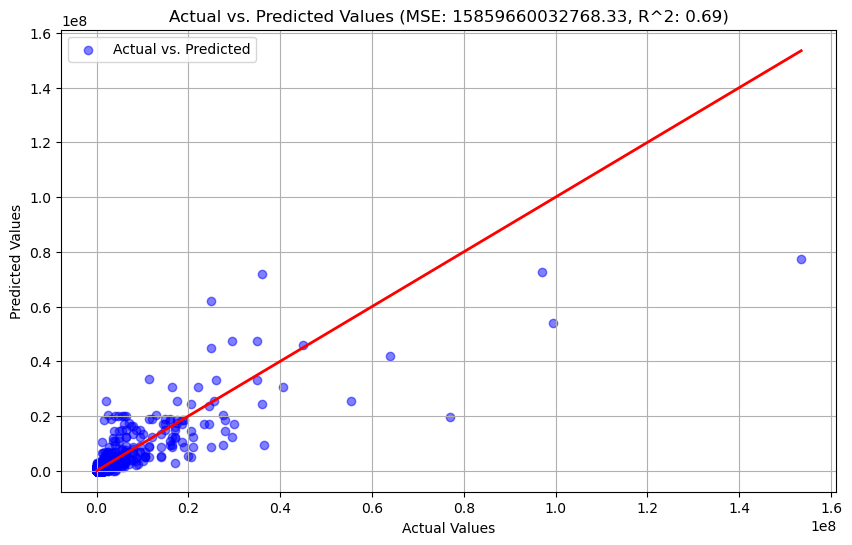

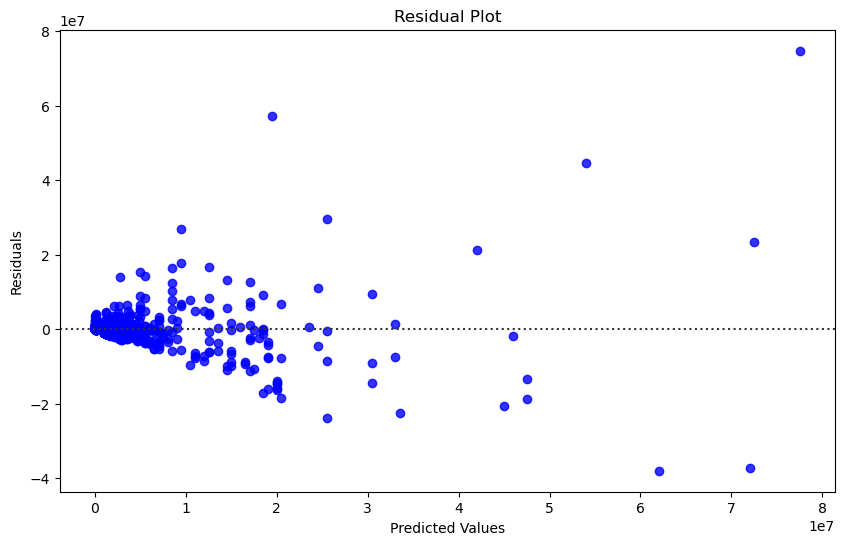

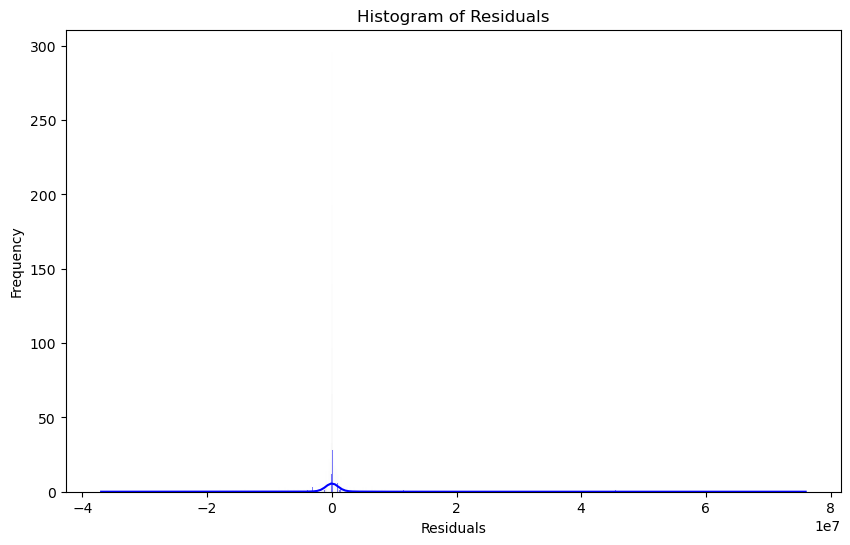

In [80]:
# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (MSE: {mse:.2f}, R^2: {r2:.2f})')

# create diagonal line that shows perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.legend()
plt.grid(True)
plt.show()

## Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, color="b")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Training Sizes: [ 454 1363 2272 3181 4090 4545] 
 Training Scores: [[-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]] 
 test_scores : [[-1.50272801e+13 -1.72692693e+13 -1.60428827e+13 -1.95444654e+13
  -5.33920406e+13]
 [-2.90982887e+13 -1.35114753e+13 -3.26357010e+13 -3.27721492e+13
  -5.50398895e+13]
 [-1.12666342e+13 -1.32641491e+13 -1.44436603e+13 -1.28811182e+13
  -2.04529246e+13]
 [-8.58395127e+12 -7.42718712e+12 -1.03895267e+13 -1.41493228e+13
  -2.64115103e+13]
 [-9.40700573e+12 -8.61688611e+12 -1.32858214e+13 -2.19597566e+13
  -2.00868537e+13]
 [-8.77199106e+12 -1.06546811e+13 -1.05227105e+13 -1.94739016e+13
  -2.77652741e+13]]


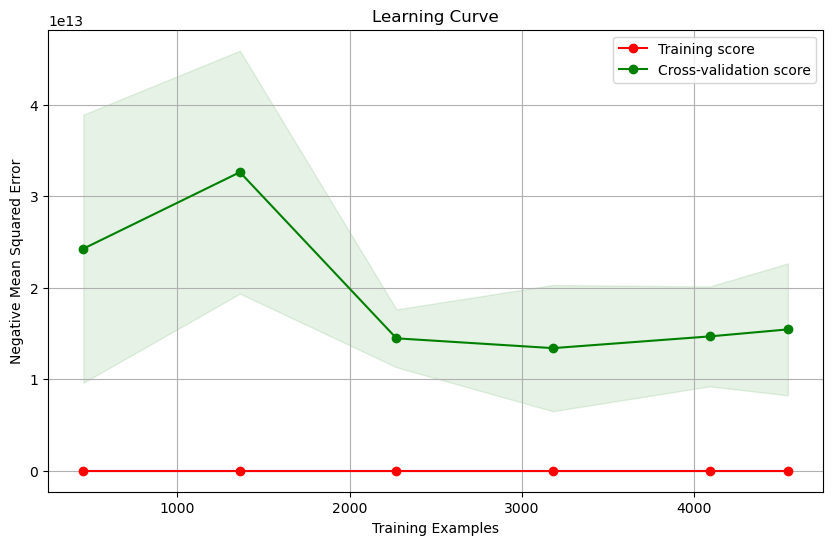

In [105]:
#visualise this models learning curve
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(random_state=42), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1], 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

print(f"Training Sizes: {train_sizes} \n Training Scores: {train_scores} \n test_scores : {test_scores}")

# Calculate mean and standard deviation for training set scores and validation set scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 1
Mean Squared Error: 28012523273407.625

R-squared score: 0.6120649700958605

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 2
Mean Squared Error: 29736423373533.23

R-squared score: 0.5881913179308365

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 4
Mean Squared Error: 34270163233499.43

R-squared score: 0.5254052386124051

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 1
Mean Squared Error: 42777640454421.55

R-squared score: 0.40758834657825405

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 2
Mean Squared Error: 20937970810827.363

R-squared score: 0.7100378193941173

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 4
Mean Squared Error: 34270163233499.43

R-squared score: 0.5254052386124051

Parameters: max_depth = None, min_samples_split = 10, min_samples_leaf = 1
Mean Squared Error: 36

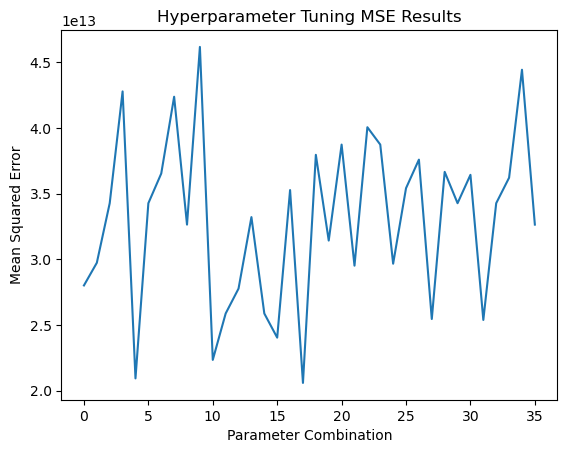

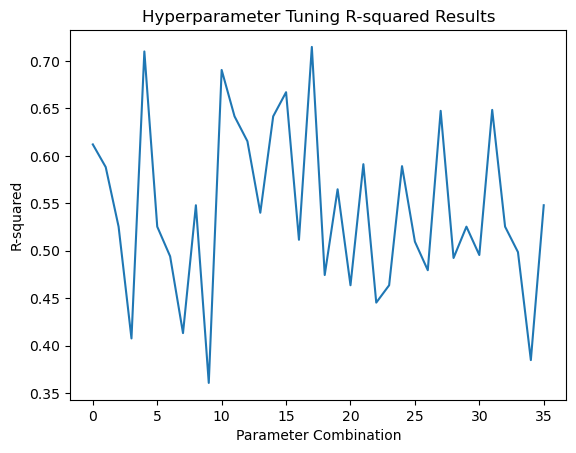

In [106]:
#Basic hyperparameter tuning
max_depths = [None, 10, 20, 30]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

# Lists to store performance metrics
MSE = []
R2 = []

# Hyperparameter tuning loop
for depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            
            # Initialize and train DecisionTreeRegressor
            model = DecisionTreeRegressor(max_depth=depth, 
                                             min_samples_split=min_samples_split,
                                             min_samples_leaf=min_samples_leaf,
                                             random_state=42, max_features='sqrt')
            
            model.fit(X_train, y_train)
            
            # Make predictions and compute Mean Squared Error and R-squared score
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Append MSE and R2 to the list
            MSE.append(mse)
            R2.append(r2)
            
            # Print the results
            print(f"Parameters: max_depth = {depth}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}")
            print(f"Mean Squared Error: {mse}\n")
            print(f"R-squared score: {r2}\n")

# Plotting results
# Visualize the MSE values corresponding to different hyperparameters
plt.plot(range(len(MSE)), MSE)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning MSE Results')
plt.show()

# Visualize the R-Squared score values corresponding to different hyperparameters
plt.plot(range(len(R2)), R2)
plt.xlabel('Parameter Combination')
plt.ylabel('R-squared')
plt.title('Hyperparameter Tuning R-squared Results')
plt.show()